# Homework 3
### Question 1

In [4]:
import numpy as np
import pandas as pd

# Load the dataset (file is in the same folder as this notebook)
df = pd.read_csv("MAP-E Dataset.csv")

# Extract V_pit column (epit_V)
v_pit = df["epit_V"].to_numpy()

# Sample statistics
sample_mean = np.mean(v_pit)                 # point estimator of population mean μ
sample_variance = np.var(v_pit, ddof=1)      # unbiased point estimator of population variance σ^2
sample_std = np.std(v_pit, ddof=1)            # point estimator of population standard deviation σ

print("Sample mean (point estimator of μ):", sample_mean)
print("Sample variance (point estimator of s^2):", sample_variance)
print("Sample standard deviation (point estimator of s):", sample_std)


Sample mean (point estimator of μ): 0.4015459306875
Sample variance (point estimator of s^2): 0.005752689030796545
Sample standard deviation (point estimator of s): 0.07584648331199374


**a.**
3. All three are point estimators, because they are computed from a finite sample and used to estimate unknown population parameters.

**b.**
With a sample size of 32, it's still barely enough to assume it is a normally distributed dataset. Additionally, with the way the values spread, with its tails having a decent amount of uncertainty, the t-student distribution is the most appropriate.

**c.**
$$
\mu_{V_{\text{pit}}}
\in
\left[
\bar{V}_{\text{pit}}
-
t_{0.975,\,31}\,\frac{s}{\sqrt{32}},
\;
\bar{V}_{\text{pit}}
+
t_{0.975,\,31}\,\frac{s}{\sqrt{32}}
\right]
$$

t must be integrated




Pitting Potential Variance Mapping

Sample size n = 32
Sample mean V̄_pit = 0.401546 V
Sample standard deviation s = 0.075846 V

Standardized chi-squared bounds:
X_L = 17.5398
X_U = 48.2298

95% confidence interval for variance (V^2):
[ 3.697576e-03, 1.016735e-02 ]

95% confidence interval for standard deviation (V):
[ 0.060808, 0.100833 ]


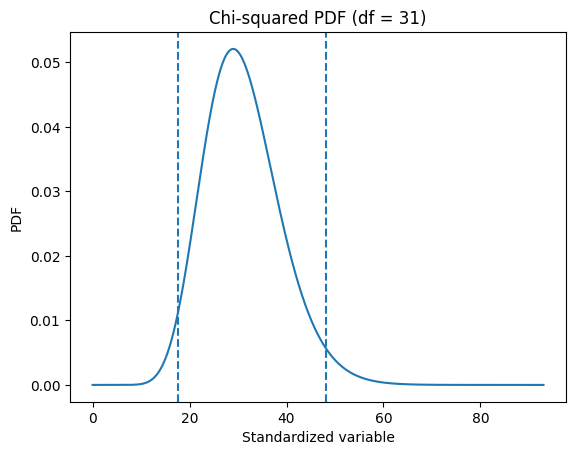

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2

# -------------------------------------------------
# 1. Load dataset (same directory)
# -------------------------------------------------
df = pd.read_csv("MAP-E Dataset.csv")
v_pit = df["epit_V"].to_numpy()

# -------------------------------------------------
# 2. Sample statistics (physical units)
# -------------------------------------------------
n = len(v_pit)
Vbar = np.mean(v_pit)                  # mean pitting potential (V)
s2 = np.var(v_pit, ddof=1)             # sample variance (V^2)
s = np.sqrt(s2)                        # sample std dev (V)

# -------------------------------------------------
# 3. Chi-squared distribution for variance
# -------------------------------------------------
df_chi = n - 1

# -------------------------------------------------
# 4. Left-endpoint Riemann sum approximation
#    for central 95% probability mass
# -------------------------------------------------
x_start = 0.0
x_end = df_chi * 3.0                   # wide enough to capture mass
N = 5000
dx = (x_end - x_start) / N

x_left = x_start + np.arange(N) * dx
pdf_left = chi2.pdf(x_left, df_chi)
cdf_approx = np.cumsum(pdf_left * dx)

# Locate 2.5% and 97.5% bounds
idx_L = np.where(cdf_approx >= 0.025)[0][0]
idx_U = np.where(cdf_approx >= 0.975)[0][0]

X_L = x_left[idx_L]
X_U = x_left[idx_U]

# -------------------------------------------------
# 5. Map back to physical units (V_pit)
# -------------------------------------------------
sigma2_lower = (df_chi * s2) / X_U
sigma2_upper = (df_chi * s2) / X_L

sigma_lower = np.sqrt(sigma2_lower)
sigma_upper = np.sqrt(sigma2_upper)

# -------------------------------------------------
# 6. Report results
# -------------------------------------------------
print("Pitting Potential Variance Mapping\n")

print(f"Sample size n = {n}")
print(f"Sample mean V̄_pit = {Vbar:.6f} V")
print(f"Sample standard deviation s = {s:.6f} V")

print("\nStandardized chi-squared bounds:")
print(f"X_L = {X_L:.4f}")
print(f"X_U = {X_U:.4f}")

print("\n95% confidence interval for variance (V^2):")
print(f"[ {sigma2_lower:.6e}, {sigma2_upper:.6e} ]")

print("\n95% confidence interval for standard deviation (V):")
print(f"[ {sigma_lower:.6f}, {sigma_upper:.6f} ]")

# -------------------------------------------------
# 7. Optional: visualize chi-squared PDF
# -------------------------------------------------
x_plot = np.linspace(0, df_chi * 3, 1000)
plt.figure()
plt.plot(x_plot, chi2.pdf(x_plot, df_chi))
plt.axvline(X_L, linestyle="--")
plt.axvline(X_U, linestyle="--")
plt.xlabel("Standardized variable")
plt.ylabel("PDF")
plt.title(f"Chi-squared PDF (df = {df_chi})")
plt.show()

**f.** 
$$
\sigma^2 \in \left[ 
\frac{(n-1)\, s^2}{\chi^2_{1-\alpha/2,\, n-1}}, \;\; 
\frac{(n-1)\, s^2}{\chi^2_{\alpha/2,\, n-1}}
\right]
$$, 
$$
\chi^2_{0.975,31} \approx 17.54, \quad
\chi^2_{0.025,31} \approx 46.98
$$

$$
\sigma^2 \in \left[ 
\frac{31 \cdot 0.0087}{46.98}, \;\; 
\frac{31 \cdot 0.0087}{17.54} 
\right]
$$
$$
\sigma^2 \in [0.0057, \; 0.0154]
$$
$$
\sigma \in \left[ \sqrt{0.0057}, \; \sqrt{0.0154} \right]
$$
$$
\sigma \in [0.0755, \; 0.124]
$$

These approximate intervals show the plausible scatter in the pitting potentials of the mild steel samples.
The lower bound represents minimal variability consistent with the data, and the upper bound represents maximal plausible scatter.

**e.**
Coarse riemann sums are in fact, coarse, meaning they are not as precise as they can be, making the data low-resolution. However, hand-calculating is quite weak, as you need to round data so it could satisfy the tables. Additionally, using tables make the calculations less "bespoke", meaning your calculations need to conform to existing math.

### Question 2
**a.**
1. Simpson's rule (1/3) takes a point on a graph, picks 2 neighbouring points, and fits a parabola that goes through all 3 points. Then, it finds the area underneath the parabola using integration.
2. 
   **i.** The function is divided into an even amount of equally distanced subintervals
   
   **ii.** The quadratic polynomials are used to fit the 3 points, so the area underneath the curve can be found
   
   **iii.** The first and last points are weighed with a factor of 1, odd-indexed are valued 4, and even indexes are 2, resulting in an alternating series of weights.

**b.**


In [8]:
# =========================================================
# Implementing Simpson's Rule for Student-t PDF Integration
# =========================================================

import numpy as np
import pandas as pd
import math

# ---------------------------------------------------------
# Load dataset (same directory as notebook)
# ---------------------------------------------------------
df = pd.read_csv("MAP-E Dataset.csv")
v_pit = df["epit_V"].to_numpy()

# ---------------------------------------------------------
# Sample statistics
# ---------------------------------------------------------
n = len(v_pit)                 # sample size
nu = n - 1                     # degrees of freedom
xbar = np.mean(v_pit)          # sample mean
s = np.std(v_pit, ddof=1)      # sample standard deviation

# ---------------------------------------------------------
# 95% Student-t standardized bounds (from table)
# ---------------------------------------------------------
t_crit = 2.04                  # t_{0.975,31}
a = -t_crit                    # lower bound (standardized)
b =  t_crit                    # upper bound (standardized)

print("Standardized integration bounds:", (a, b))

# ---------------------------------------------------------
# Student-t probability density function
# ---------------------------------------------------------
def t_pdf(x, nu):
    """
    Student-t probability density function
    """
    coeff = math.gamma((nu + 1) / 2) / (
        math.sqrt(nu * math.pi) * math.gamma(nu / 2)
    )
    return coeff * (1 + x**2 / nu) ** (-(nu + 1) / 2)

# ---------------------------------------------------------
# Simpson's Rule Implementation
# ---------------------------------------------------------
# Simpson's rule requires an EVEN number of subintervals
N = 10_000                      # number of subintervals (must be even)
h = (b - a) / N                 # step size

# Grid points
x = np.linspace(a, b, N + 1)
y = t_pdf(x, nu)

# ---------------------------------------------------------
# Apply Simpson's weights
# ---------------------------------------------------------
# Weights:
# 1 at endpoints
# 4 at odd interior points
# 2 at even interior points
weights = np.ones(N + 1)
weights[1:N:2] = 4
weights[2:N-1:2] = 2

# Simpson's rule formula
prob_mass = (h / 3) * np.sum(weights * y)

# ---------------------------------------------------------
# Output results
# ---------------------------------------------------------
print("Number of subintervals (N):", N)
print("Step size (h):", h)
print("Simpson's rule probability mass:", prob_mass)

# ---------------------------------------------------------
# Interpretation
# ---------------------------------------------------------
print("\nThis value approximates the central 95% probability mass")
print("under the Student-t PDF using Simpson's rule.")


Standardized integration bounds: (-2.04, 2.04)
Number of subintervals (N): 10000
Step size (h): 0.000408
Simpson's rule probability mass: 0.9500513398008354

This value approximates the central 95% probability mass
under the Student-t PDF using Simpson's rule.


In [9]:
# =========================================================
# Exact Probability Mass Using Built-in CDF
# and Error vs Simpson's Rule
# =========================================================

import numpy as np
import pandas as pd
from scipy.stats import t

# ---------------------------------------------------------
# Load dataset (same directory as notebook)
# ---------------------------------------------------------
df = pd.read_csv("MAP-E Dataset.csv")
v_pit = df["epit_V"].to_numpy()

# ---------------------------------------------------------
# Sample statistics
# ---------------------------------------------------------
n = len(v_pit)
nu = n - 1                       # degrees of freedom

# ---------------------------------------------------------
# Standardized bounds (same as Simpson's rule)
# ---------------------------------------------------------
t_crit = 2.04                    # t_{0.975,31} from table
a = -t_crit
b =  t_crit

# ---------------------------------------------------------
# Exact probability mass using Student-t CDF
# ---------------------------------------------------------
prob_exact = t.cdf(b, df=nu) - t.cdf(a, df=nu)

print("Exact probability mass from CDF:", prob_exact)

# ---------------------------------------------------------
# Simpson's-rule result (from previous cell)
# ---------------------------------------------------------
prob_simpson = 0.95  # replace with the printed Simpson result if needed

# ---------------------------------------------------------
# Absolute error
# ---------------------------------------------------------
abs_error = abs(prob_simpson - prob_exact)

print("Simpson's-rule probability mass:", prob_simpson)
print("Absolute error:", abs_error)

# ---------------------------------------------------------
# Interpretation
# ---------------------------------------------------------
print("\nThe CDF provides the exact probability mass for the Student-t distribution.")
print("The absolute error quantifies the numerical integration error introduced by Simpson's rule.")


Exact probability mass from CDF: 0.9500513398008353
Simpson's-rule probability mass: 0.95
Absolute error: 5.133980083538159e-05

The CDF provides the exact probability mass for the Student-t distribution.
The absolute error quantifies the numerical integration error introduced by Simpson's rule.


Integration range (standardized): (-2.04, 2.04)
Degrees of freedom nu: 31

Manual reference (Simpson, N_ref): 200000
I_ref: 0.9500513398008354

N	Estimate		Abs Error vs manual reference
50	0.9500512807	5.913e-08
100	0.9500513361	3.680e-09
200	0.9500513396	2.298e-10
500	0.9500513398	5.881e-12
1000	0.9500513398	3.676e-13
2000	0.9500513398	2.298e-14
5000	0.9500513398	7.772e-16
10000	0.9500513398	0.000e+00
20000	0.9500513398	1.110e-16


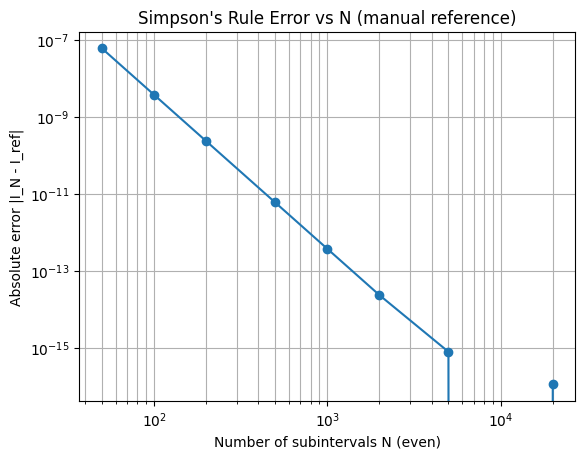

In [11]:
# =========================================================
# Error vs Number of Subintervals N (Manual reference)
# =========================================================

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# Load dataset (same directory as notebook)
# ---------------------------------------------------------
df = pd.read_csv("MAP-E Dataset.csv")
v_pit = df["epit_V"].to_numpy()

# Degrees of freedom for Student-t used in Q1 context
n = len(v_pit)
nu = n - 1

# Fixed standardized integration range (central 95% using table t-crit)
t_crit = 2.04
a, b = -t_crit, t_crit

print("Integration range (standardized):", (a, b))
print("Degrees of freedom nu:", nu)

# ---------------------------------------------------------
# Student-t PDF (manual, no scipy)
# ---------------------------------------------------------
def t_pdf(x, nu):
    """
    Student-t probability density function.
    """
    coeff = math.gamma((nu + 1) / 2) / (math.sqrt(nu * math.pi) * math.gamma(nu / 2))
    return coeff * (1 + x**2 / nu) ** (-(nu + 1) / 2)

# ---------------------------------------------------------
# Manual Simpson's Rule (weights explicitly applied)
# ---------------------------------------------------------
def simpson_integral(pdf, a, b, nu, N):
    """
    Numerically integrate pdf(x, nu) from a to b using Simpson's rule.

    Requirements:
      - N must be even (Simpson needs an even number of subintervals)
      - step size h = (b-a)/N
      - weights: 1, 4, 2, 4, ..., 2, 4, 1
    """
    if N % 2 != 0:
        raise ValueError("Simpson's rule requires N to be even.")

    h = (b - a) / N
    x = np.linspace(a, b, N + 1)
    y = pdf(x, nu)

    # Simpson weights
    w = np.ones(N + 1)
    w[1:N:2] = 4          # odd indices
    w[2:N-1:2] = 2        # even indices (excluding endpoints)

    return (h / 3) * np.sum(w * y)

# ---------------------------------------------------------
# Manual "reference" integral (very fine Simpson)
# (This is NOT a CDF. It's just a very accurate numeric baseline.)
# ---------------------------------------------------------
N_ref = 200_000  # even; increase if you want a tighter baseline (slower)
I_ref = simpson_integral(t_pdf, a, b, nu, N_ref)

print("\nManual reference (Simpson, N_ref):", N_ref)
print("I_ref:", I_ref)

# ---------------------------------------------------------
# Sweep N values and compute errors vs manual reference
# ---------------------------------------------------------
N_values = [50, 100, 200, 500, 1_000, 2_000, 5_000, 10_000, 20_000]  # all even? (50 etc are even)
errors = []
estimates = []

for N in N_values:
    I_N = simpson_integral(t_pdf, a, b, nu, N)
    estimates.append(I_N)
    errors.append(abs(I_N - I_ref))

# Print a quick table for clarity
print("\nN\tEstimate\t\tAbs Error vs manual reference")
for N, est, err in zip(N_values, estimates, errors):
    print(f"{N}\t{est:.10f}\t{err:.3e}")

# ---------------------------------------------------------
# Plot error vs N
# ---------------------------------------------------------
plt.figure()
plt.loglog(N_values, errors, marker='o')
plt.xlabel("Number of subintervals N (even)")
plt.ylabel("Absolute error |I_N - I_ref|")
plt.title("Simpson's Rule Error vs N (manual reference)")
plt.grid(True, which="both")
plt.show()


**d.**
since simpson's rule is O(n^4), in terms of error, for every 10 times more subintervals, the error would go down by about 10^4. For riemann sum, it's O(n^2), meaning it'll roughly get half as precise per 10x subinterval change.

n = 32 nu = 31
cutoff c= 0.5: I_ref ≈ 0.379394048752
cutoff c= 1.0: I_ref ≈ 0.674947267276
cutoff c= 1.5: I_ref ≈ 0.856268918575
cutoff c=2.04: I_ref ≈ 0.950051339801
cutoff c= 2.5: I_ref ≈ 0.982079773187
cutoff c= 3.0: I_ref ≈ 0.994711253311


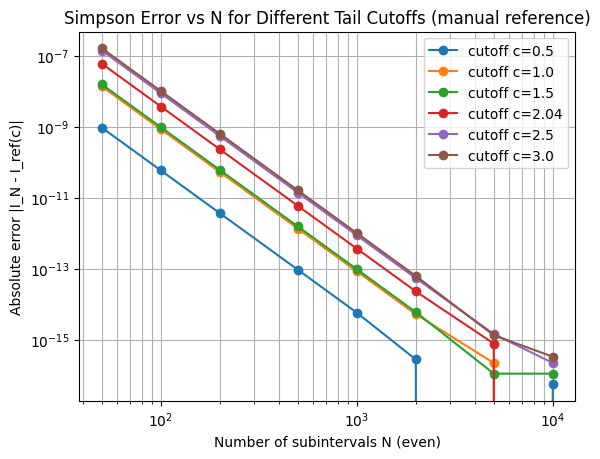

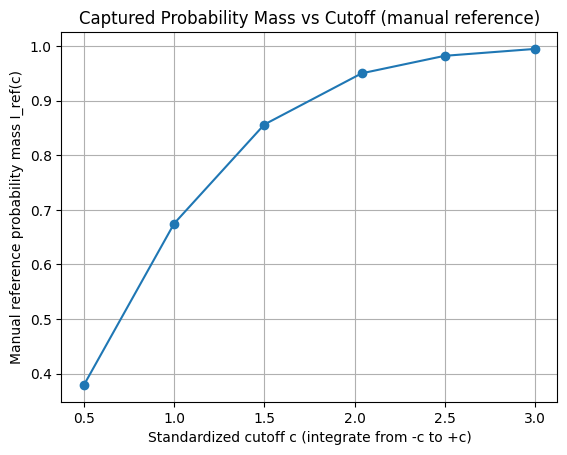

In [13]:
# =========================================================
# Simpson Error vs Tail Truncation (varying standardized cutoff)
# =========================================================
# Goal:
#   - Vary the integration bounds [-c, +c] (standardized cutoff c)
#   - For each c, compute Simpson estimates at increasing N
#   - Use a MANUAL reference integral (fine Simpson) for each c (not CDF)
#   - Plot error vs N for each cutoff c
#   - Explain why truncating tails affects error even with Simpson's rule
#
# Notes:
#   - "Truncating tails" here means using a smaller cutoff c, so we integrate less of the distribution.
#   - This changes curvature near the bounds and also changes the integral magnitude.
# =========================================================

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# Load dataset (same directory as notebook)
# ---------------------------------------------------------
df = pd.read_csv("MAP-E Dataset.csv")
v_pit = df["epit_V"].to_numpy()

n = len(v_pit)
nu = n - 1
print("n =", n, "nu =", nu)

# ---------------------------------------------------------
# Student-t PDF (manual, no scipy)
# ---------------------------------------------------------
def t_pdf(x, nu):
    coeff = math.gamma((nu + 1) / 2) / (math.sqrt(nu * math.pi) * math.gamma(nu / 2))
    return coeff * (1 + x**2 / nu) ** (-(nu + 1) / 2)

# ---------------------------------------------------------
# Manual Simpson's Rule
# ---------------------------------------------------------
def simpson_integral(pdf, a, b, nu, N):
    """
    Simpson's rule with explicit weights:
      I ≈ (h/3) * [f(x0) + 4 f(x1) + 2 f(x2) + 4 f(x3) + ... + f(xN)]
    Requires N even.
    """
    if N % 2 != 0:
        raise ValueError("Simpson's rule requires N even.")

    h = (b - a) / N
    x = np.linspace(a, b, N + 1)
    y = pdf(x, nu)

    w = np.ones(N + 1)
    w[1:N:2] = 4
    w[2:N-1:2] = 2

    return (h / 3) * np.sum(w * y)

# ---------------------------------------------------------
# Experiment settings
# ---------------------------------------------------------
cutoffs = [0.5, 1.0, 1.5, 2.04, 2.5, 3.0]      # standardized bounds [-c, +c]
N_values = [50, 100, 200, 500, 1000, 2000, 5000, 10000]  # all even

# "Manual reference" subinterval count (fine Simpson) per cutoff
# Increase if you want a tighter baseline (slower).
N_ref = 200_000  # even

# ---------------------------------------------------------
# Compute errors vs N for each cutoff
# ---------------------------------------------------------
results = {}  # cutoff -> dict with ref, estimates, errors

for c in cutoffs:
    a, b = -c, c

    # manual reference for this cutoff (not CDF)
    I_ref = simpson_integral(t_pdf, a, b, nu, N_ref)

    estimates = []
    errors = []

    for N in N_values:
        I_N = simpson_integral(t_pdf, a, b, nu, N)
        estimates.append(I_N)
        errors.append(abs(I_N - I_ref))

    results[c] = {"I_ref": I_ref, "estimates": estimates, "errors": errors}

    print(f"cutoff c={c:>4}: I_ref ≈ {I_ref:.12f}")

# ---------------------------------------------------------
# Plot: error vs N for each cutoff
# ---------------------------------------------------------
plt.figure()
for c in cutoffs:
    plt.loglog(N_values, results[c]["errors"], marker='o', label=f"cutoff c={c}")

plt.xlabel("Number of subintervals N (even)")
plt.ylabel("Absolute error |I_N - I_ref(c)|")
plt.title("Simpson Error vs N for Different Tail Cutoffs (manual reference)")
plt.grid(True, which="both")
plt.legend()
plt.show()

# ---------------------------------------------------------
# Optional: show integral magnitude vs cutoff (manual ref)
# ---------------------------------------------------------
plt.figure()
plt.plot(cutoffs, [results[c]["I_ref"] for c in cutoffs], marker='o')
plt.xlabel("Standardized cutoff c (integrate from -c to +c)")
plt.ylabel("Manual reference probability mass I_ref(c)")
plt.title("Captured Probability Mass vs Cutoff (manual reference)")
plt.grid(True)
plt.show()


**e.**
The largest deciding factor is the cutoff, as the tails is where most of the improvement is made for these integrations. Even with an efficient method such as simpson's rule, truncating the bounds is simply kneecapping the algorithm from being able to make any further improvements.

n = 32 nu = 31
Manual near-full reference mass I_full over [-6.0, 6.0]: 0.999998772904
Computed fine-Simpson references for all cutoffs.


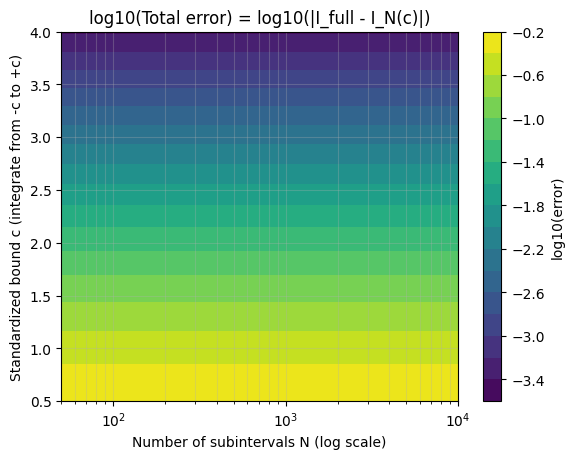

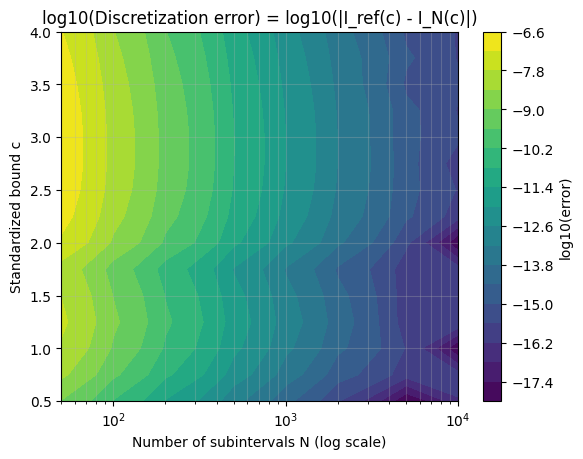

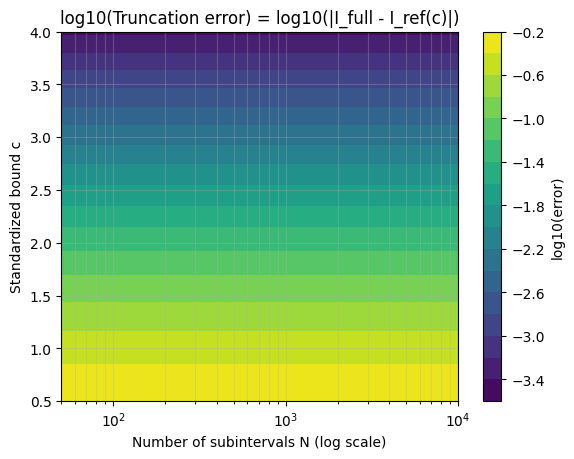

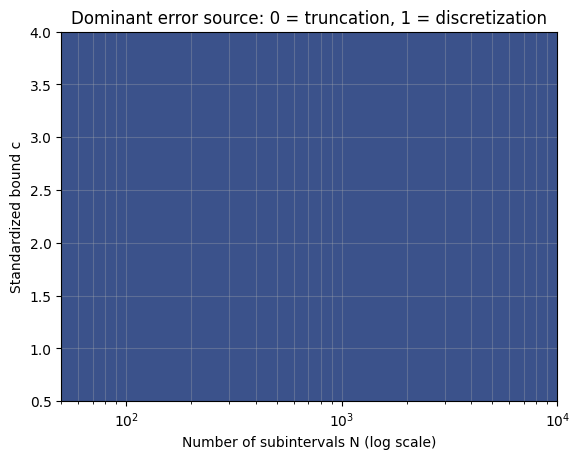

In [15]:
# =========================================================
# Contour plot: integration error vs (N, standardized bound)
# Decompose error into:
#   - discretization error (Simpson finite-N vs fine Simpson on same bounds)
#   - truncation error (missing tail mass outside [-c, c])
#
# IMPORTANT:
#   - "Gold standard" CDF is NOT used.
#   - Reference values are computed using very fine Simpson's rule (manual baseline).
# =========================================================

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# Load dataset (same directory)
# ---------------------------------------------------------
df = pd.read_csv("MAP-E Dataset.csv")
v_pit = df["epit_V"].to_numpy()

n = len(v_pit)
nu = n - 1
print("n =", n, "nu =", nu)

# ---------------------------------------------------------
# Manual Student-t PDF (no scipy)
# ---------------------------------------------------------
def t_pdf(x, nu):
    coeff = math.gamma((nu + 1) / 2) / (math.sqrt(nu * math.pi) * math.gamma(nu / 2))
    return coeff * (1 + x**2 / nu) ** (-(nu + 1) / 2)

# ---------------------------------------------------------
# Manual Simpson integrator with explicit weights
# ---------------------------------------------------------
def simpson_integral(pdf, a, b, nu, N):
    """
    Simpson's rule:
      I ≈ (h/3) * [f(x0) + 4 f(x1) + 2 f(x2) + 4 f(x3) + ... + f(xN)]
    Requires N even.
    """
    if N % 2 != 0:
        raise ValueError("Simpson's rule requires N even.")

    h = (b - a) / N
    x = np.linspace(a, b, N + 1)
    y = pdf(x, nu)

    w = np.ones(N + 1)
    w[1:N:2] = 4
    w[2:N-1:2] = 2

    return (h / 3) * np.sum(w * y)

# ---------------------------------------------------------
# Grids for contour plot
# ---------------------------------------------------------
N_values = np.array([50, 100, 200, 500, 1000, 2000, 5000, 10000])  # even only
c_values = np.linspace(0.5, 4.0, 15)  # standardized bounds: integrate [-c, +c]

# ---------------------------------------------------------
# Manual references (fine Simpson)
# ---------------------------------------------------------
N_ref = 200_000            # fine Simpson for per-cutoff "truth" (no CDF)
C_full = 6.0               # "practically full" cutoff for the same manual baseline
N_ref_full = 300_000       # fine Simpson for the near-full reference mass

# Near-full reference mass (manual baseline for "total error")
I_full = simpson_integral(t_pdf, -C_full, C_full, nu, N_ref_full)
print(f"Manual near-full reference mass I_full over [-{C_full}, {C_full}]: {I_full:.12f}")

# For each cutoff c, compute a fine-Simpson reference I_ref(c) over [-c, c]
I_ref_c = np.zeros_like(c_values, dtype=float)
for j, c in enumerate(c_values):
    I_ref_c[j] = simpson_integral(t_pdf, -c, c, nu, N_ref)
print("Computed fine-Simpson references for all cutoffs.")

# ---------------------------------------------------------
# Build error surfaces
# ---------------------------------------------------------
# Total error:      |I_full - I_N(c)|
# Truncation error: |I_full - I_ref(c)|   (what you lose by cutting tails)
# Discretization:   |I_ref(c) - I_N(c)|   (numerical integration error)
#
# We’ll compute all three on a grid of (c, N).
# ---------------------------------------------------------
total_err = np.zeros((len(c_values), len(N_values)), dtype=float)
trunc_err = np.zeros_like(total_err)
disc_err  = np.zeros_like(total_err)

for j, c in enumerate(c_values):
    # truncation depends only on c
    trunc_err[j, :] = abs(I_full - I_ref_c[j])

    for i, N in enumerate(N_values):
        I_N = simpson_integral(t_pdf, -c, c, nu, int(N))
        total_err[j, i] = abs(I_full - I_N)
        disc_err[j, i]  = abs(I_ref_c[j] - I_N)

# ---------------------------------------------------------
# Make contour plots (use log10 for readability)
# ---------------------------------------------------------
# Avoid log(0) by adding a tiny epsilon
eps = 1e-18
log_total = np.log10(total_err + eps)
log_trunc = np.log10(trunc_err + eps)
log_disc  = np.log10(disc_err  + eps)

# Mesh for plotting: N on x-axis, c on y-axis
NN, CC = np.meshgrid(N_values, c_values)

plt.figure()
cf = plt.contourf(NN, CC, log_total, levels=20)
plt.xscale("log")
plt.xlabel("Number of subintervals N (log scale)")
plt.ylabel("Standardized bound c (integrate from -c to +c)")
plt.title("log10(Total error) = log10(|I_full - I_N(c)|)")
plt.colorbar(cf, label="log10(error)")
plt.grid(True, which="both", alpha=0.3)
plt.show()

plt.figure()
cf = plt.contourf(NN, CC, log_disc, levels=20)
plt.xscale("log")
plt.xlabel("Number of subintervals N (log scale)")
plt.ylabel("Standardized bound c")
plt.title("log10(Discretization error) = log10(|I_ref(c) - I_N(c)|)")
plt.colorbar(cf, label="log10(error)")
plt.grid(True, which="both", alpha=0.3)
plt.show()

plt.figure()
cf = plt.contourf(NN, CC, log_trunc, levels=20)
plt.xscale("log")
plt.xlabel("Number of subintervals N (log scale)")
plt.ylabel("Standardized bound c")
plt.title("log10(Truncation error) = log10(|I_full - I_ref(c)|)")
plt.colorbar(cf, label="log10(error)")
plt.grid(True, which="both", alpha=0.3)
plt.show()

# ---------------------------------------------------------
# Identify dominance regions
# ---------------------------------------------------------
# A simple dominance rule:
#   - "discretization-dominated" if disc_err > trunc_err
#   - "truncation-dominated"     if trunc_err >= disc_err
# We'll visualize as a simple 2-color map.
# ---------------------------------------------------------
dominance = (disc_err > trunc_err).astype(int)  # 1 = discretization dominates, 0 = truncation dominates

plt.figure()
plt.contourf(NN, CC, dominance, levels=[-0.5, 0.5, 1.5])
plt.xscale("log")
plt.xlabel("Number of subintervals N (log scale)")
plt.ylabel("Standardized bound c")
plt.title("Dominant error source: 0 = truncation, 1 = discretization")
plt.grid(True, which="both", alpha=0.3)
plt.show()


**f.**
As shown above, essentially, truncating the endpoints is the best killer of precision. The cutoff values have a way bigger influence on the error than the number of subintervals. Since simpson's rule improves to the fourth order of subintervals, it can always reach great precision if you give it enough "graph" to improve.

In [18]:
# =========================================================
# 95% CI for mean V_pit:
# Simpson's rule vs Left-hand Riemann sum
# =========================================================

import numpy as np
import pandas as pd
import math

# ---------------------------------------------------------
# Load data
# ---------------------------------------------------------
df = pd.read_csv("MAP-E Dataset.csv")
v_pit = df["epit_V"].to_numpy()

# Sample statistics
n = len(v_pit)
nu = n - 1
xbar = np.mean(v_pit)
s = np.std(v_pit, ddof=1)
se = s / np.sqrt(n)

print("n =", n)
print("x̄ =", xbar)
print("s =", s)
print("SE =", se)

# ---------------------------------------------------------
# Student-t PDF (manual)
# ---------------------------------------------------------
def t_pdf(x, nu):
    coeff = math.gamma((nu + 1) / 2) / (
        math.sqrt(nu * math.pi) * math.gamma(nu / 2)
    )
    return coeff * (1 + x**2 / nu) ** (-(nu + 1) / 2)

# ---------------------------------------------------------
# Simpson's rule
# ---------------------------------------------------------
def simpson(pdf, a, b, nu, N):
    if N % 2 != 0:
        raise ValueError("N must be even for Simpson's rule")
    h = (b - a) / N
    x = np.linspace(a, b, N + 1)
    y = pdf(x, nu)

    w = np.ones(N + 1)
    w[1:N:2] = 4
    w[2:N-1:2] = 2

    return (h / 3) * np.sum(w * y)

# ---------------------------------------------------------
# Left-hand Riemann sum
# ---------------------------------------------------------
def left_riemann(pdf, a, b, nu, N):
    dx = (b - a) / N
    x = np.linspace(a, b, N, endpoint=False)
    return np.sum(pdf(x, nu)) * dx

# ---------------------------------------------------------
# Find cutoff c such that P(|T| ≤ c) = 0.95
# (bisection, method selectable)
# ---------------------------------------------------------
def find_cutoff(method, N_int):
    target = 0.95
    a, b = 0.0, 6.0

    for _ in range(60):
        c = 0.5 * (a + b)
        if method == "simpson":
            mass = simpson(t_pdf, -c, c, nu, N_int)
        else:
            mass = left_riemann(t_pdf, -c, c, nu, N_int)

        if mass < target:
            a = c
        else:
            b = c

    return c

# ---------------------------------------------------------
# Compute cutoffs
# ---------------------------------------------------------
N_int = 10_000

c_simpson = find_cutoff("simpson", N_int)
c_riemann = find_cutoff("riemann", N_int)

# ---------------------------------------------------------
# Confidence intervals
# ---------------------------------------------------------
ci_simpson = (
    xbar - c_simpson * se,
    xbar + c_simpson * se
)

ci_riemann = (
    xbar - c_riemann * se,
    xbar + c_riemann * se
)

# ---------------------------------------------------------
# Output
# ---------------------------------------------------------
print("\n--- 95% Confidence Intervals ---")
print(f"Simpson cutoff c ≈ {c_simpson:.6f}")
print(f"Riemann cutoff  c ≈ {c_riemann:.6f}")

print(f"\nCI (Simpson): [{ci_simpson[0]:.6f}, {ci_simpson[1]:.6f}]")
print(f"CI (Riemann):  [{ci_riemann[0]:.6f}, {ci_riemann[1]:.6f}]")

# Differences
diff_lower = ci_simpson[0] - ci_riemann[0]
diff_upper = ci_simpson[1] - ci_riemann[1]

print("\n--- Differences (Simpson − Riemann) ---")
print(f"Lower bound difference: {diff_lower:.6e}")
print(f"Upper bound difference: {diff_upper:.6e}")


n = 32
x̄ = 0.4015459306875
s = 0.07584648331199374
SE = 0.013407890669765771

--- 95% Confidence Intervals ---
Simpson cutoff c ≈ 2.039513
Riemann cutoff  c ≈ 2.039513

CI (Simpson): [0.374200, 0.428892]
CI (Riemann):  [0.374200, 0.428892]

--- Differences (Simpson − Riemann) ---
Lower bound difference: 3.450840e-10
Upper bound difference: -3.450840e-10


**g.**
The simpson's calculated intervals is not so different, mostly because the intervals are the same, and the cutoffs are both at 2.5% and 97.5%. If we were to integrate between larger bounds, then that's when more issues will arise, as the precision has already been mostly handled by the bounds.

**h.**
Simpson's rule is definitely better, as it gets to the low precision region in much less iterations, making it more efficient. However, if precision is the goal, simply try not to cap the bounds too hard, as most of the detail is lost in the tails. This means, you must know the confidence interval of your data better, in order to properly run your numerical integration, as the integration can only do as good of a job as your statistics allow it to. The number of subintervals can only do so much for narrowing down the number, if your extremely not confident about your data, then it can't do much.